In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import cv2

### Read Image

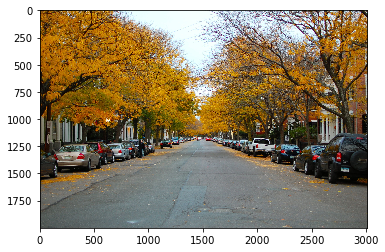

In [2]:
image = cv2.imread('Data/street.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Convert to grayscale

In [3]:
def rgb2gray(rgb):
    gray = np.mean(rgb, axis=2)
    return gray

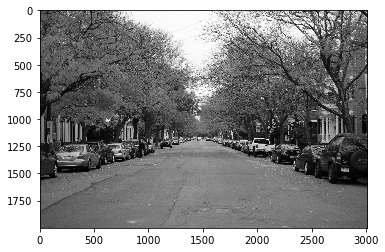

In [4]:
gray = rgb2gray(image)
plt.imshow(gray,cmap='gray')

### Binarization 

In [5]:
def Binarization(gray_img, threshold = 150):
    binarized = 1.0 * (gray_img > threshold)
    return binarized

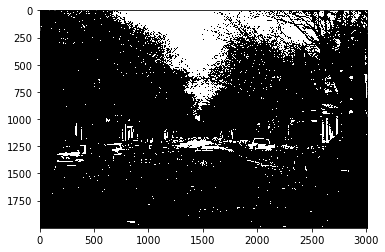

In [6]:
binary = Binarization(gray)
plt.imshow(binary, cmap='gray')

# Radon

In [7]:
from scipy.ndimage import rotate

In [8]:
def discrete_radon_transform(img, steps):
    # crate matrix
    w, h = img.shape
    zero = np.zeros((w, steps), dtype='float64')
    # sum and roatate
    for s in range(steps):
        rotation = rotate(img, s, reshape=False).astype('float64')
        # cut image
        cut = (rotation.shape[1] - rotation.shape[0]) / 2
        hm  = int(h - cut)
        hl  = int(cut)
        rotation = rotation[:,hl:hm]
        # sum
        zero[:, s] = np.sum(rotation, axis=0)
    # rotate image
    zero = rotate(zero, 180, reshape=False).astype('float64')
    return zero

In [9]:
radonn = discrete_radon_transform(gray, 180)

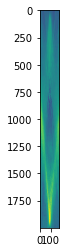

In [10]:
plt.imshow(radonn)

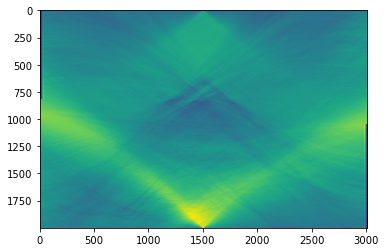

In [12]:
res = cv2.resize(radonn.T, dsize=(gray.shape), interpolation=cv2.INTER_CUBIC)
plt.imshow(res.T)

### Сравнение с библиоекой 

In [13]:
from skimage.transform import radon

c:\users\alkzir\appdata\local\programs\python\python37\lib\site-packages\skimage\transform\radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


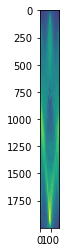

In [14]:
plt.imshow(radon(gray))

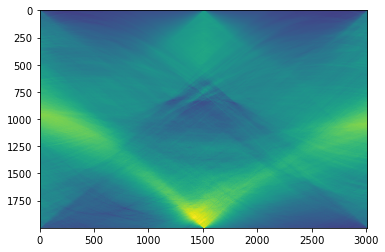

In [15]:
theta = np.linspace(0., 180., max(gray.shape), endpoint=False)
sinogram = radon(gray, theta=theta, circle=True)
plt.imshow(sinogram)

In [16]:
i,j = np.unravel_index(res.argmax(), res.shape)
print(i, j)

1402 1899


In [17]:
i,j = np.unravel_index(radonn.argmax(), radonn.shape)
print(i, j)

1900 84


In [ ]:
radonn.shape